#  UNDERSTAND THE PROBLEM STATEMENT

Customer Churn :-

·         Get to know customers better, by accessing the data about their plans and usage, and getting in touch with interesting profiles


·         Target clients with more effective advertising based on their usage profiles

·         Retrieve customers with very high likeliness of churn so we could get in touch and offer them special deals before they even thought of leaving

·         Get to know customers better, by accessing the data about their plans and usage, and getting in touch with interesting profiles

·         Target clients with more effective advertising based on their usage profiles


·         Use customers.csv as train & unlabled_customer.csv as test


# IMPORT LIBRARIES AND DATASETS

In [83]:
# import the necessary libraries

#! conda install xgb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import shap


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV



In [84]:
# read the csv file 
churn_df = pd.read_csv("customers.csv")

In [76]:
churn_df.head(50)

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0     KS             128        415  382-4657         no        yes   
1     OH             107        415  371-7191         no        yes   
2     NJ             137        415  358-1921         no         no   
3     OH              84        408  375-9999        yes         no   
4     OK              75        415  330-6626        yes         no   
5     AL             118        510  391-8027        yes         no   
6     MA             121        510  355-9993         no        yes   
7     MO             147        415  329-9001        yes         no   
8     LA             117        408  335-4719         no         no   
9     WV             141        415  330-8173        yes        yes   
10    IN              65        415  329-6603         no         no   
11    RI              74        415  344-9403         no         no   
12    IA             168        408  363-1107         no         no   
13    MT              95        510  394-8006         no         no   
14    IA              62        415  366-9238         no         no   
15    NY             161        415  351-7269         no         no   
16    ID              85        408  350-8884         no        yes   
17    VT              93        510  386-2923         no         no   
18    VA              76        510  356-2992         no        yes   
19    TX              73        415  373-2782         no         no   
20    FL             147        415  396-5800         no         no   
21    CO              77        408  393-7984         no         no   
22    AZ             130        415  358-1958         no         no   
23    SC             111        415  350-2565         no         no   
24    VA             132        510  343-4696         no         no   
25    NE             174        415  331-3698         no         no   
26    WY              57        408  357-3817         no        yes   
27    MT              54        408  418-6412         no         no   
28    MO              20        415  353-2630         no         no   
29    HI              49        510  410-7789         no         no   
30    IL             142        415  416-8428         no         no   
31    NH              75        510  370-3359         no         no   
32    LA             172        408  383-1121         no         no   
33    AZ              12        408  360-1596         no         no   
34    OK              57        408  395-2854         no        yes   
35    GA              72        415  362-1407         no        yes   
36    AK              36        408  341-9764         no        yes   
37    MA              78        415  353-3305         no         no   
38    AK             136        415  402-1381        yes        yes   
39    NJ             149        408  332-9891         no         no   
40    GA              98        408  372-9976         no         no   
41    MD             135        408  383-6029        yes        yes   
42    AR              34        510  353-7289         no         no   
43    ID             160        415  390-7274         no         no   
44    WI              64        510  352-1237         no         no   
45    OR              59        408  353-3061         no        yes   
46    MI              65        415  363-5450         no         no   
47    DE             142        408  364-1995         no         no   
48    ID             119        415  398-1294         no         no   
49    WY              97        415  405-7146         no        yes   

    VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  \
0              25     265.1        110       45.07  ...         99   
1              26     161.6        123       27.47  ...        103   
2               0     243.4        114       41.38  ...        110   
3               0     299.4         71       50.90  ...         88   
4               0     166.7    

In [55]:
# Checking the dataframe information

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

# EDA AKA EXPLORARY DATA ANALYTICS

In [56]:
# Statistical summary of the dataframe
churn_df.describe().T

count        mean        std     min     25%     50%     75%  \
Account Length  3333.0  101.064806  39.822106    1.00   74.00  101.00  127.00   
Area Code       3333.0  437.182418  42.371290  408.00  408.00  415.00  510.00   
VMail Message   3333.0    8.099010  13.688365    0.00    0.00    0.00   20.00   
Day Mins        3333.0  179.775098  54.467389    0.00  143.70  179.40  216.40   
Day Calls       3333.0  100.435644  20.069084    0.00   87.00  101.00  114.00   
Day Charge      3333.0   30.562307   9.259435    0.00   24.43   30.50   36.79   
Eve Mins        3333.0  200.980348  50.713844    0.00  166.60  201.40  235.30   
Eve Calls       3333.0  100.114311  19.922625    0.00   87.00  100.00  114.00   
Eve Charge      3333.0   17.083540   4.310668    0.00   14.16   17.12   20.00   
Night Mins      3333.0  200.872037  50.573847   23.20  167.00  201.20  235.30   
Night Calls     3333.0  100.107711  19.568609   33.00   87.00  100.00  113.00   
Night Charge    3333.0    9.039325   2.275873    1.04    7.52    9.05   10.59   
Intl Mins       3333.0   10.237294   2.791840    0.00    8.50   10.30   12.10   
Intl Calls      3333.0    4.479448   2.461214    0.00    3.00    4.00    6.00   
Intl Charge     3333.0    2.764581   0.753773    0.00    2.30    2.78    3.27   
CustServ Calls  3333.0    1.562856   1.315491    0.00    1.00    1.00    2.00   

                   max  
Account Length  243.00  
Area Code       510.00  
VMail Message    51.00  
Day Mins        350.80  
Day Calls       165.00  
Day Charge       59.64  
Eve Mins        363.70  
Eve Calls       170.00  
Eve Charge       30.91  
Night Mins      395.00  
Night Calls     175.00  
Night Charge     17.77  
Intl Mins        20.00  
Intl Calls       20.00  
Intl Charge       5.40  
CustServ Calls    9.00

In [57]:
# checking the null values
churn_df.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

In [107]:
# Even though the Area Code is given as Integer but this is suppose to be a categorical 
churn_df['Area Code']=churn_df['Area Code'].astype('object', copy=True) 
churn_df.dtypes

State              object
Account Length      int64
Area Code          object
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

### unique values for categorical variables

In [108]:
for column in churn_df.columns:
    if churn_df[column].dtype == 'object':
        print(column.upper(),': ',churn_df[column].nunique())
        print(churn_df[column].value_counts().sort_values())
        print('\n')

STATE :  51
CA     34
IA     44
PA     45
LA     51
AK     52
TN     53
HI     53
GA     54
DC     54
AR     55
NH     56
IL     58
KY     59
SD     60
SC     60
DE     61
OK     61
NE     61
ND     62
ME     62
NM     62
MO     63
FL     63
AZ     64
RI     65
MA     65
MS     65
NV     66
CO     66
WA     66
MT     68
NC     68
NJ     68
MD     70
KS     70
IN     71
TX     72
UT     72
VT     73
ID     73
MI     73
CT     74
WY     77
VA     77
WI     78
OH     78
OR     78
AL     80
NY     83
MN     84
WV    106
Name: State, dtype: int64


AREA CODE :  3
408     838
510     840
415    1655
Name: Area Code, dtype: int64


PHONE :  3333
405-7467    1
404-1002    1
385-7387    1
341-7112    1
416-1676    1
           ..
384-8629    1
401-6162    1
402-9704    1
398-2148    1
352-6282    1
Name: Phone, Length: 3333, dtype: int64


INT'L PLAN :  2
yes     323
no     3010
Name: Int'l Plan, dtype: int64


VMAIL PLAN :  2
yes     922
no     2411
Name: VMail Plan, dtype: int64


CHURN? :  2

## Are there any duplicates ?

In [59]:
# Checking duplicates 
dups = churn_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 0


### Proportion in the Target classes

In [60]:
churn_df["Churn?"].value_counts(normalize=True)

False.    0.855086
True.     0.144914
Name: Churn?, dtype: float64

In [109]:
df=churn_df[['Account Length',  'VMail Message', 'Day Mins', 'Day Calls','Day Charge', 'Eve Mins','Eve Calls', 'Eve Charge','Night Mins', 'Night Calls','Night Charge', 'Intl Mins','Intl Calls','Intl Charge', 'CustServ Calls']]

df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

Account Length  VMail Message     Day Mins    Day Calls   Day Charge  \
count     3333.000000    3333.000000  3333.000000  3333.000000  3333.000000   
mean       101.064806       8.099010   179.775098   100.435644    30.562307   
std         39.822106      13.688365    54.467389    20.069084     9.259435   
min          1.000000       0.000000     0.000000     0.000000     0.000000   
25%         74.000000       0.000000   143.700000    87.000000    24.430000   
50%        101.000000       0.000000   179.400000   101.000000    30.500000   
75%        127.000000      20.000000   216.400000   114.000000    36.790000   
90%        152.000000      32.000000   249.580000   126.000000    42.428000   
95%        167.000000      36.000000   270.740000   133.000000    46.028000   
99%        195.000000      43.000000   305.168000   146.000000    51.876800   
max        243.000000      51.000000   350.800000   165.000000    59.640000   

          Eve Mins    Eve Calls   Eve Charge   Night Mins  Night Calls  \
count  3333.000000  3333.000000  3333.000000  3333.000000  3333.000000   
mean    200.980348   100.114311    17.083540   200.872037   100.107711   
std      50.713844    19.922625     4.310668    50.573847    19.568609   
min       0.000000     0.000000     0.000000    23.200000    33.000000   
25%     166.600000    87.000000    14.160000   167.000000    87.000000   
50%     201.400000   100.000000    17.120000   201.200000   100.000000   
75%     235.300000   114.000000    20.000000   235.300000   113.000000   
90%     265.800000   125.000000    22.590000   264.200000   125.000000   
95%     284.300000   133.000000    24.170000   282.840000   132.000000   
99%     318.936000   147.000000    27.113600   317.448000   146.680000   
max     363.700000   170.000000    30.910000   395.000000   175.000000   

       Night Charge    Intl Mins   Intl Calls  Intl Charge  CustServ Calls  
count   3333.000000  3333.000000  3333.000000  3333.000000     3333.000000  
mean       9.039325    10.237294     4.479448     2.764581        1.562856  
std        2.275873     2.791840     2.461214     0.753773        1.315491  
min        1.040000     0.000000     0.000000     0.000000        0.000000  
25%        7.520000     8.500000     3.000000     2.300000        1.000000  
50%        9.050000    10.300000     4.000000     2.780000        1.000000  
75%       10.590000    12.100000     6.000000     3.270000        2.000000  
90%       11.890000    13.700000     8.000000     3.700000        3.000000  
95%       12.730000    14.700000     9.000000     3.970000        4.000000  
99%       14.284000    16.668000    13.000000     4.500400        6.000000  
max       17.770000    20.000000    20.000000     5.400000        9.000000


##### INFERENCE : The Target Class "Chrun?" is imbalanced.  

15


<AxesSubplot:>

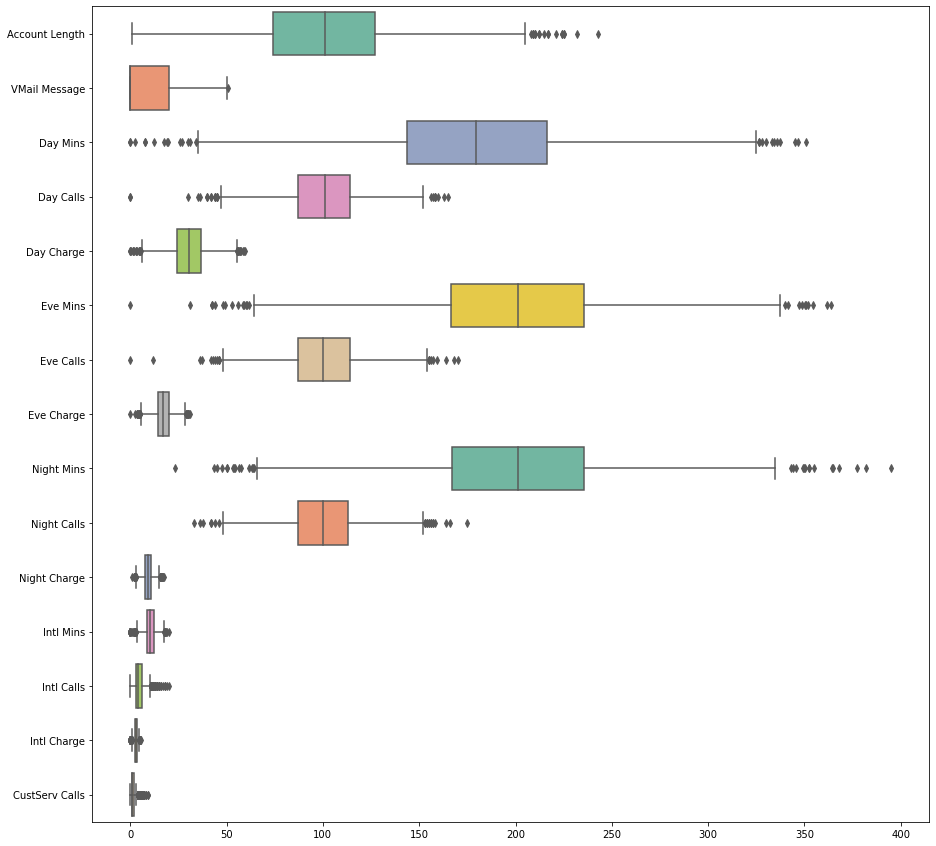

In [111]:
# construct box plot for continuous variables
plt.figure(figsize=(15,15))
df=churn_df[['Account Length', 'VMail Message', 'Day Mins', 'Day Calls','Day Charge', 'Eve Mins','Eve Calls', 'Eve Charge','Night Mins', 'Night Calls','Night Charge', 'Intl Mins','Intl Calls','Intl Charge', 'CustServ Calls']]
print(len(df.columns))
sns.boxplot(data=df, orient="h", palette="Set2")

## Handling Outliars

In [112]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [113]:
#columns=['Account Length','Day Mins']
columns=['Account Length', 'VMail Message', 'Day Mins', 'Day Calls','Day Charge', 'Eve Mins','Eve Calls', 'Eve Charge','Night Mins', 'Night Calls','Night Charge', 'Intl Mins','Intl Calls','Intl Charge', 'CustServ Calls']

i=0


for column in columns:   
    ol_upper_cnt=0
    ol_lower_cnt=0
    lower,upper=remove_outlier(UL_df[column])
    if (churn_df[column].dtype != 'object'):
        
        print("Attribute Name: ",column)
        print("Lower Bound: ",lower)
        print("Upper Bound: ",upper)
        print("Numer of records: ",len(churn_df[column]))
        for i in range(len(UL_df[column])):
            if(churn_df[column][i]<lower):
                ol_lower_cnt=ol_lower_cnt+1          
            if(churn_df[column][i]>upper):
                ol_upper_cnt=ol_upper_cnt+1
            i+=1    
    
        print("Count of Upper outliars: ",ol_upper_cnt)
        print("Count of Lower outliars: ",ol_lower_cnt)
        tot_ol=ol_lower_cnt+ol_upper_cnt
        print("Total Outliars: ",tot_ol)
        print("Total Outliars%: ",(tot_ol/len(churn_df[column])*100),'\n\n') 
 


Attribute Name:  Account Length
Lower Bound:  -8.0
Upper Bound:  208.0
Numer of records:  3333
Count of Upper outliars:  10
Count of Lower outliars:  0
Total Outliars:  10
Total Outliars%:  0.3000300030003 


Attribute Name:  VMail Message
Lower Bound:  -31.5
Upper Bound:  52.5
Numer of records:  3333
Count of Upper outliars:  0
Count of Lower outliars:  0
Total Outliars:  0
Total Outliars%:  0.0 


Attribute Name:  Day Mins
Lower Bound:  36.900000000000006
Upper Bound:  324.9
Numer of records:  3333
Count of Upper outliars:  8
Count of Lower outliars:  8
Total Outliars:  16
Total Outliars%:  0.4800480048004801 


Attribute Name:  Day Calls
Lower Bound:  48.0
Upper Bound:  152.0
Numer of records:  3333
Count of Upper outliars:  5
Count of Lower outliars:  10
Total Outliars:  15
Total Outliars%:  0.45004500450045004 


Attribute Name:  Day Charge
Lower Bound:  6.27
Upper Bound:  55.23
Numer of records:  3333
Count of Upper outliars:  8
Count of Lower outliars:  8
Total Outliars:  16
Tot

# OBSERVATION

<span style='font-family: Arial; font-size:1.2em;color:green'>     



## For now the outliars are replaced by upper/lower values. However the 'CustServ Calls' have 4.32% outliars. Need investigation on the same. 
    
</span>    

In [4]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [8]:
columns=['Account Length', 'Area Code', 'VMail Message', 'Day Mins', 'Day Calls','Day Charge', 
          'Eve Mins','Eve Calls', 'Eve Charge','Night Mins', 'Night Calls','Night Charge', 'Intl Mins',
          'Intl Calls','Intl Charge', 'CustServ Calls']

for i in columns:                                        
    lower,upper=remove_outlier(churn_df[i])
    churn_df[i]=np.where(churn_df[i]>upper,upper,churn_df[i])
    churn_df[i]=np.where(churn_df[i]<lower,lower,churn_df[i])


<AxesSubplot:>

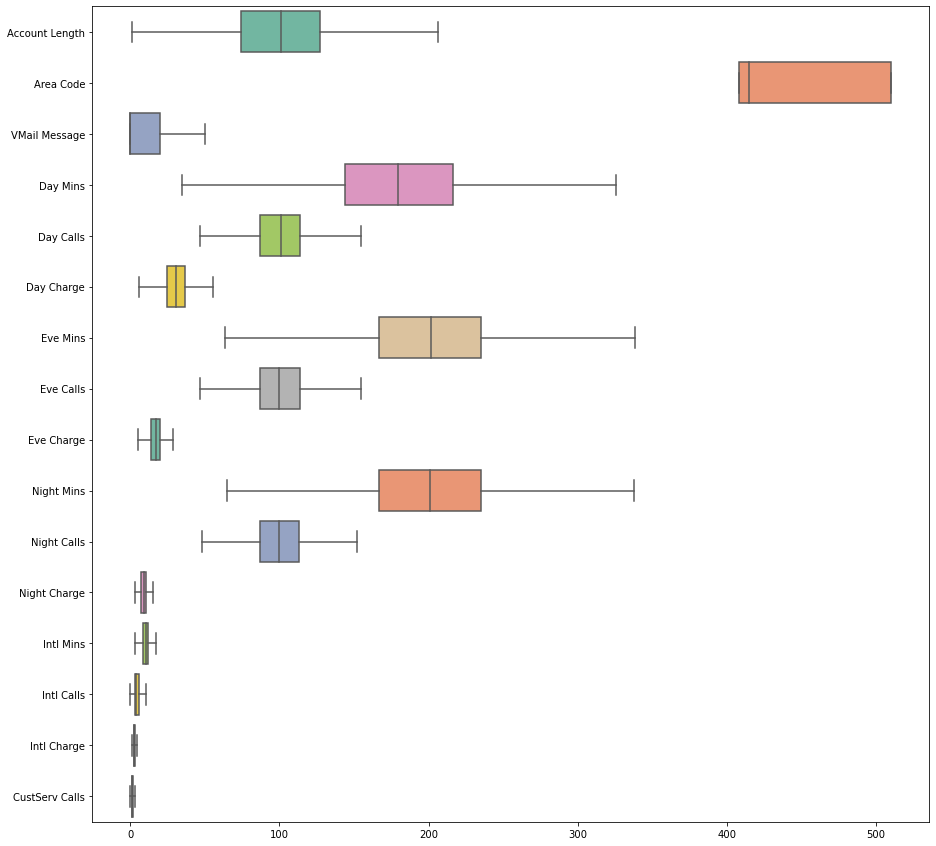

In [9]:
# construct box plot for continuous variables
plt.figure(figsize=(15,15))
#df=churn_df[['Account Length', 'Area Code', 'VMail Message', 'Day Mins', 'Day Calls','Day Charge', 'Eve Mins','Eve Calls', 'Eve Charge','Night Mins', 'Night Calls','Night Charge', 'Intl Mins','Intl Calls','Intl Charge', 'CustServ Calls']]
sns.boxplot(data=churn_df, orient="h", palette="Set2")

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


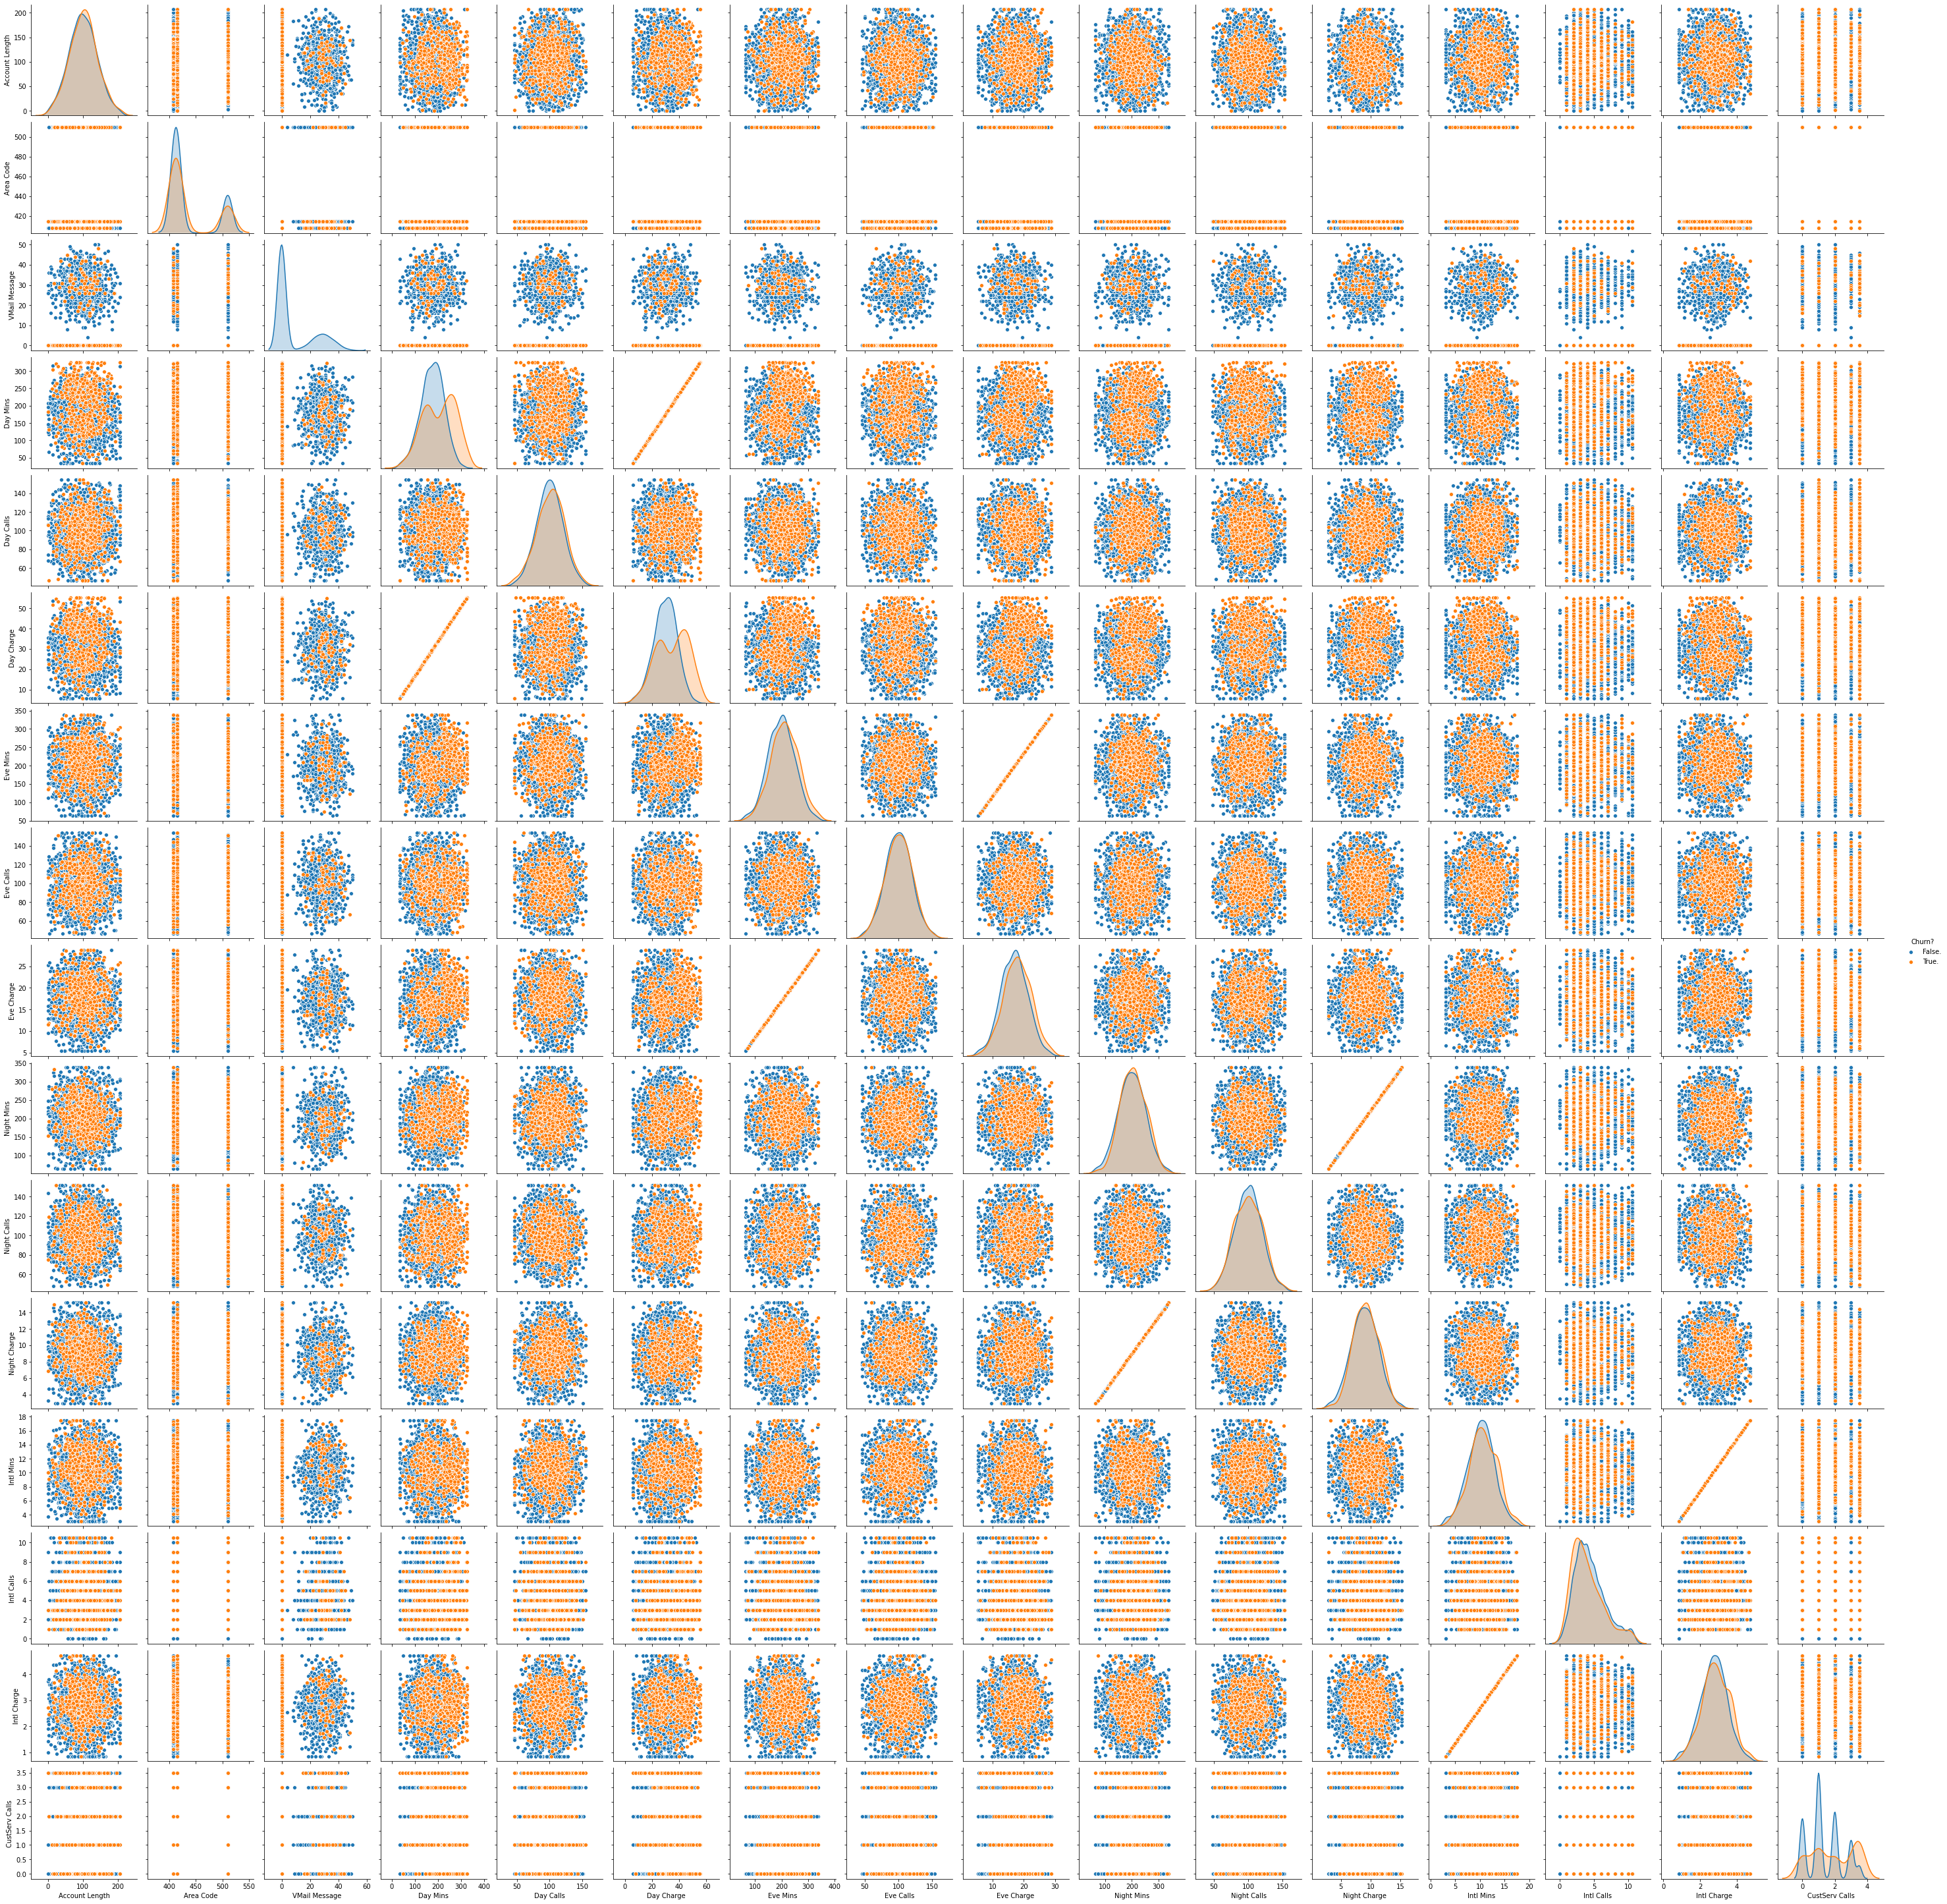

In [9]:
sns.pairplot(churn_df,hue="Churn?", diag_kind='kde')

##  Converting all objects to categorical codes

In [11]:
for feature in churn_df.columns: 
    if churn_df[feature].dtype == 'object': 
        print('\n')
#       print('feature:',feature)
#       print(pd.Categorical(churn_df[feature].unique()))
#       print(pd.Categorical(churn_df[feature].unique()).codes)
        churn_df[feature] = pd.Categorical(churn_df[feature]).codes

#  CREATE TRAINING AND TESTING DATASET

In [12]:
# split the dataframe into target and features

X = churn_df.drop(columns =['Churn?'])
y = churn_df['Churn?']

## Splitting data into training and test set (TRAIN=80%;TEST=20%)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#spliting the data in to test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=1)


In [15]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (2666, 20)
X_test (667, 20)
y_train (2666,)
y_test (667,)


In [16]:
feature_columns = []

for col in X_train:
        feature_columns.append(col)
feature_columns  

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls']

<AxesSubplot:>

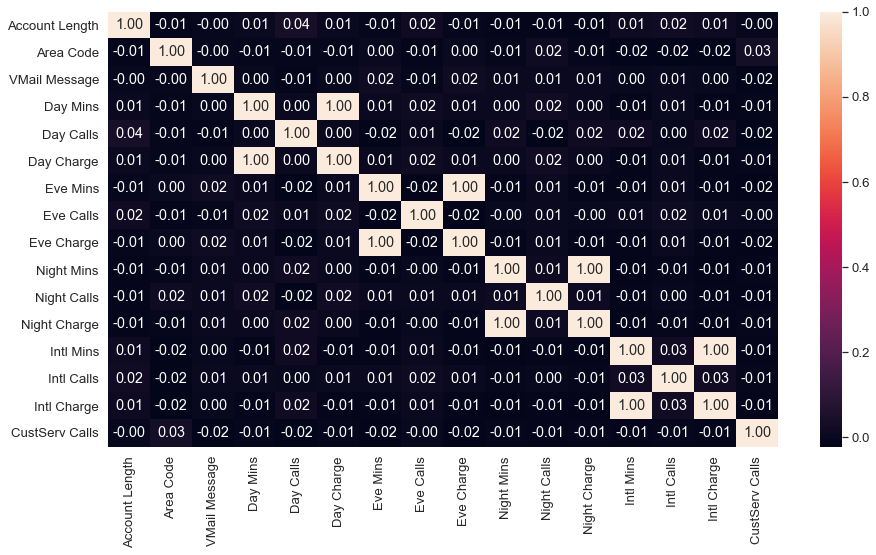

In [17]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.2)
sns.heatmap(churn_df[['Account Length', 'Area Code', 'VMail Message', 'Day Mins', 'Day Calls','Day Charge', 
          'Eve Mins','Eve Calls', 'Eve Charge','Night Mins', 'Night Calls','Night Charge', 'Intl Mins',
          'Intl Calls','Intl Charge', 'CustServ Calls']].corr(), annot=True, fmt='.2f')

## If you closely look at the heatmap it looks entirely black (except the diagonal). Which means none of the feature have a correlation more than .2 . Hence we can consider that there is not much of multicoliniarity 

#  TRAIN AND TEST XGBOOST MODEL 

In [18]:
# use xgboost model in local mode

# Please note that I have not performed any normalization or scaling since XGBoost is not sensitive to this.
# It doesn't really matter if the features are scaled or not.


X = churn_df.drop(columns =['Churn?'])
y = churn_df['Churn?']

#model = xgb.XGBClassifier()


# Creating a grid search using GridSearchCV

#imbalance_factor = 2.9623376623376623

imbalance_factor =  0.5 * np.sum(y_train == 0) / float(np.sum(y_train == 1)) 


clf = xgb.XGBClassifier(objective='binary:logistic', random_state=13,use_label_encoder=False)

params = {
    'learning_rate': [0.01],   # Learning rate alpha
    'max_depth': [6, 8],   # maximum depth of the tree
    'gamma': [0.1, 0.5],   # minimum eval_score deduction at each split
    'min_child_weight': [10],  # minimum number of datapoints in a split
    'subsample': [0.7],  # sample size row-wise during bootstrap
    'colsample_bytree': [0.7],  # column-wise sample size
    'n_estimators': [100,200],   # number of trees to build
    'scale_pos_weight': [imbalance_factor] # used for solving the imbalance in class labels
#    'scale_pos_weight': [1,2,2.5,3,4] # used for solving the imbalance in class labels  
}

grid = GridSearchCV(clf, params, cv=5, verbose=50, n_jobs=-1)
model=grid.fit(X_train, y_train)



Fitting 5 folds for each of 8 candidates, totalling 40 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   13

In [1]:
#### Shap is not working : I need to find more info regarding the same. 

# load your data here, e.g. X and y
# create and fit your model here


# load JS visualization code to notebook
#shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
#explainer = shap.TreeExplainer(model)
#explainer = shap.KernelExplainer(model.predict,X_train)
#shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
#shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

#shap.summary_plot(shap_values, X, plot_type="bar")



In [19]:
print(grid.best_params_)
best_grid = grid.best_estimator_
best_grid

{'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 10, 'n_estimators': 200, 'scale_pos_weight': 2.9623376623376623, 'subsample': 0.7}


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=13,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2.9623376623376623,
              subsample=0.7, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

scale = np.abs((np.std(input_train, 0)* model.coef_[0])).sum()
feat_imp = pd.Series((np.std(X_train, 0)* model.coef_[0])/scale, index=feature_columns).abs().sort_values(ascending=False)
feat_imp[:20].plot(kind='bar', title='Feature Importance with XGB', figsize=(15,8))
plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)
plt.show()

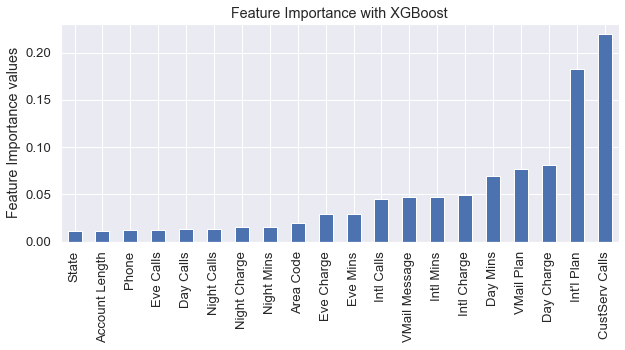

In [20]:
feat_imp = pd.Series(grid.best_estimator_.feature_importances_, index=feature_columns).sort_values(ascending=True)
feat_imp[:20].plot(kind='bar', title='Feature Importance with XGBoost', figsize=(10,4))
plt.ylabel('Feature Importance values')
#plt.vlines
plt.show()

# Predicting on Training  dataset In XGboost 

In [34]:
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,recall_score,precision_score
from sklearn.metrics import classification_report,confusion_matrix

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2281
           1       0.88      0.86      0.87       385

    accuracy                           0.96      2666
   macro avg       0.93      0.92      0.92      2666
weighted avg       0.96      0.96      0.96      2666

Precision = 0.8776595744680851
Recall = 0.8571428571428571
Accuracy = 0.9621155288822205


<Figure size 3600x864 with 0 Axes>

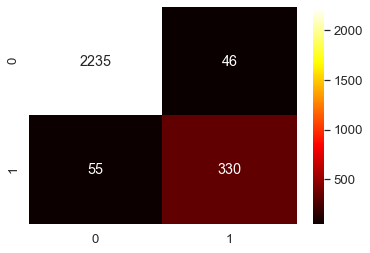

In [101]:
# Assess trained model performance on test dataset
predict_train = model.predict(X_train)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, predict_train)
plt.figure(figsize=(50,12))
sns.set(font_scale=1.2)
plt.figure()
sns.heatmap(cm, annot=True,fmt= 'd', cmap='hot')
print(classification_report(y_train, predict_train))

print("Precision = {}".format(precision_score(y_train, predict_train)))
print("Recall = {}".format(recall_score(y_train, predict_train)))
print("Accuracy = {}".format(accuracy_score(y_train, predict_train)))

AUC: 0.975


[<matplotlib.lines.Line2D at 0x7fdb6a547eb0>]

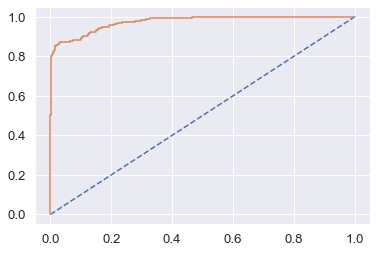

In [31]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
#plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)



# Predicting on Testing  dataset

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       569
           1       0.76      0.79      0.77        98

    accuracy                           0.93       667
   macro avg       0.86      0.87      0.87       667
weighted avg       0.93      0.93      0.93       667

Precision = 0.7623762376237624
Recall = 0.7857142857142857
Accuracy = 0.9325337331334332


<Figure size 3600x864 with 0 Axes>

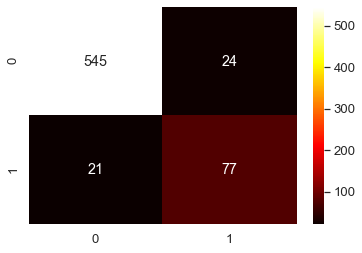

In [35]:

# Assess trained model performance on test dataset
predict_test = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_test)
plt.figure(figsize=(50,12))
sns.set(font_scale=1.2)
plt.figure()
sns.heatmap(cm, annot=True,fmt= 'd', cmap='hot')
print(classification_report(y_test, predict_test))




print("Precision = {}".format(precision_score(y_test, predict_test)))
print("Recall = {}".format(recall_score(y_test, predict_test)))
print("Accuracy = {}".format(accuracy_score(y_test, predict_test)))

AUC: 0.895
Area under Curve is 0.8945877120619777


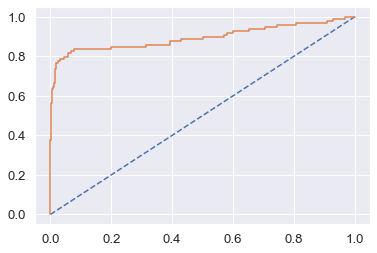

In [36]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

cart_test_auc=roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', cart_test_auc)

# Neural Network Classifier

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)# fitting and transformning the training data.
X_test=sc.transform(X_test) #we are not fitting standardscalar on testing data to prevent any leak of prior information of the test data to the model.The testing data will use the mean and the std of the training dataset to transform.

In [105]:
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes': [50,100,200],
    'max_iter': [2500,5000],
    'solver': ['adam','sgd'],
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [106]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'hidden_layer_sizes': 200, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [107]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1, tol=0.01)

## I did not find any straight way to find features importance in ANN  


feat_imp = pd.Series(grid_search.coef_, index=feature_columns).sort_values(ascending=True)
feat_imp[:10].plot(kind='bar', title='Feature Importance with ANN', figsize=(10,4))
plt.ylabel('Feature Importance values')
#plt.vlines
plt.show()

In [108]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

# Train data metrices for ANN model 

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2281
           1       0.82      0.49      0.61       385

    accuracy                           0.91      2666
   macro avg       0.87      0.73      0.78      2666
weighted avg       0.90      0.91      0.90      2666

nn_train_precision  0.82
nn_train_recall  0.49
nn_train_f1  0.61
nn_train_accuracy  0.92


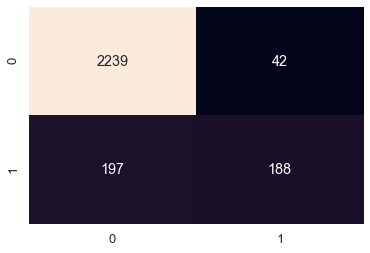

In [111]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True,fmt='d',cbar=False)
nn_train_acc=best_grid.score(X_train,y_train) 
nn_train_acc
print(classification_report(y_train,ytrain_predict))

nn_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df1=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df1.loc["1"][0],2)
nn_train_recall=round(df1.loc["1"][1],2)
nn_train_f1=round(df1.loc["1"][2],2)
nn_train_f2=round(df1.loc["0"][0],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)
print ('nn_train_accuracy ',nn_train_f2)


## AUC CURVE FOR ANN

Area under Curve is 0.9124102552423463


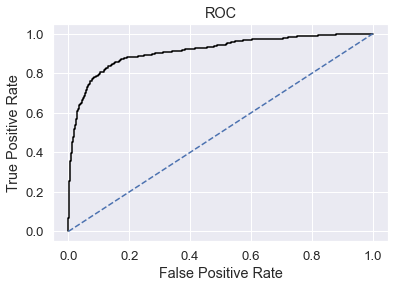

In [88]:
nn_train_fpr, nn_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

# Test data metrices for ANN model 

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       569
           1       0.80      0.41      0.54        98

    accuracy                           0.90       667
   macro avg       0.85      0.70      0.74       667
weighted avg       0.89      0.90      0.88       667

nn_test_precision  0.8
nn_test_recall  0.41
nn_test_f1  0.54
nn_test_accuracy  0.91


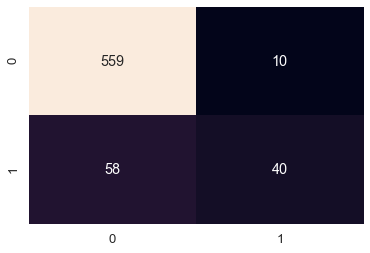

In [113]:
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,fmt='d',cbar=False)
nn_train_acc=best_grid.score(X_test,y_test) 
nn_train_acc
print(classification_report(y_test,ytest_predict))


nn_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df1=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df1.loc["1"][0],2)
nn_train_recall=round(df1.loc["1"][1],2)
nn_train_f1=round(df1.loc["1"][2],2)
nn_train_f2=round(df1.loc["0"][0],2)
print ('nn_test_precision ',nn_train_precision)
print ('nn_test_recall ',nn_train_recall)
print ('nn_test_f1 ',nn_train_f1)
print ('nn_test_accuracy ',nn_train_f2)

In [90]:
n_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df1=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df1.loc["1"][0],2)
nn_train_recall=round(df1.loc["1"][1],2)
nn_train_f1=round(df1.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.82
nn_train_recall  0.49
nn_train_f1  0.61


## AUC CURVE FOR ANN MODEL

Area under Curve is 0.8646210681108999


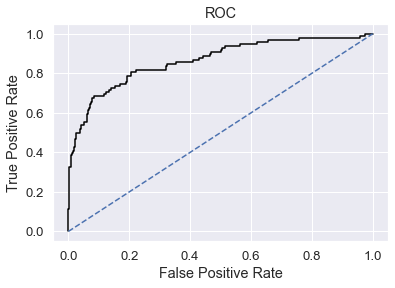

In [91]:
nn_test_fpr, nn_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

<span style='font-family: Arial; font-size:3.4em;color:black'> Explanation for Model choice </span>

<span style='font-family: Arial; font-size:1 em;color:blue'> As per the below statistics both XGboost & ANN have good Acuuracy and 'best fit'. However since it is important to have a higher recall value which means that a lower false negative case. That means XGboost model have a high accuracy to identify class 1 data points. That means model has less number of case where model falsely predicts a customer as non-churner while it actually churns. If a model does not able to predict a customer who churns and classify as non-churner. </span>      



# XGboost Model

## TRAIN 

<span style='font-family: Arial; font-size:.8em;color:green'>
    
### Precision = 0.8776595744680851
### Recall = 0.8571428571428571
### Accuracy = 0.9621155288822205
</span>

## TEST 
<span style='font-family: Arial; font-size:.8em;color:green'>

### Precision = 0.7623762376237624
### Recall = 0.7857142857142857
### Accuracy = 0.9325337331334332

</span> 

# ANN Model: 

## TRAIN

<span style='font-family: Arial; font-size:.8em;color:green'>
    
### nn_train_precision  0.82
### nn_train_recall  0.49
### nn_train_f1  0.61
### nn_train_accuracy  0.92
    
</span> 

## TEST 

<span style='font-family: Arial; font-size:.8em;color:green'>

### nn_test_precision  0.8
### nn_test_recall  0.41
### nn_test_f1  0.54
### nn_test_accuracy  0.91

</span> 

# Analysis of the most important features for Churning & Suggestion

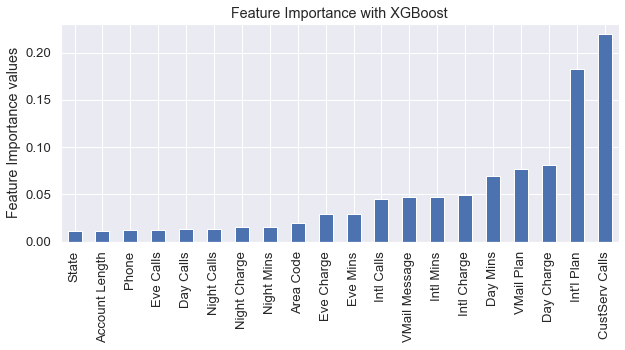

In [73]:
feat_imp = pd.Series(grid.best_estimator_.feature_importances_, index=feature_columns).sort_values(ascending=True)
feat_imp[:20].plot(kind='bar', title='Feature Importance with XGBoost', figsize=(10,4))
plt.ylabel('Feature Importance values')
#plt.vlines
plt.show()

### 1. Customer Calls To Service Center

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


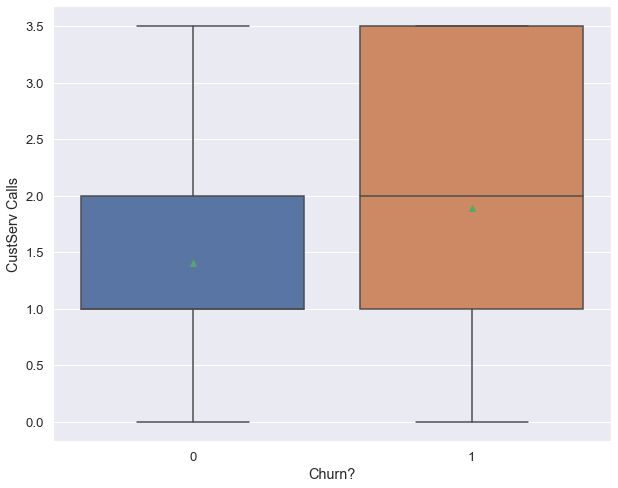

In [86]:
#plt.figure(figsize=(20,3))
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.boxplot(churn_df['Churn?'],churn_df['CustServ Calls'],showmeans=True);

## Explanation

### Customer Service call I understand as the people who churned have made more calls to customer care as the median/mean is way to high in comparison to the people who have not churned. 


# Suggestion

## Hence the suggestion would be to have a keen watch on the number of calls made by each customer to customer care and improve the service in those areas.   

## May be a more detail analysis is needed to understand the churn number State wise. A Higher Churn ration in particular state reflect poor infrastructure in that state. 

## In this case , since the class imbalance is little to high so it is not possible analyze the case with this data 

**churn_df.groupby(['Churn?','State'])['CustServ Calls'].count()
**df.groupby(["state", "gender"])["last_name"].count()

# 2. 'Int'l Plan' &  'Intl Calls' 
 


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='Churn?', ylabel='Intl Calls'>

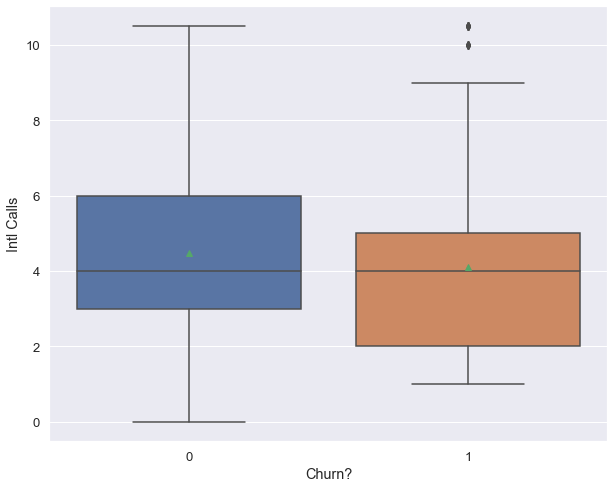

In [100]:
columns = ['Intl Calls','Intl Mins','Intl Charge']
# construct box plot for continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)


sns.boxplot(churn_df['Churn?'],churn_df['Intl Calls'],showmeans=True)


## Explanation

## From the BoxPlot is is clear that the customers who churned is little left scewed while who did not churn is little right scewed. That means people who chruned made much less international call than those who did not churn.  

## The median is 4 in both the case, however the mean is little high for those who did not churn. Means people who made International calls more  they stayed back.  

## So the customers who made >2 - 10 International calls They suppose to reatin. That means the international call service is good for this service provider and/or cheap in comparison with other service provider in the market. 


## Similarly International Plan is also the second highest feature of having Churn. Like the above explanation if the customer have International plan those customers most likely not to churn.

##  Since the data have a huge class imbalance and this is a categorical data, its difficult to explain through data that how the 'Int'l Plan' feature plays significant role in customer churn. 






## Suggestion


## So one strategy would be to campaing/offer International Call package for the customers who is predicted to be churn. 


# 3 'Intl Mins' & 'Intl Charge'

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='Churn?', ylabel='Intl Charge'>

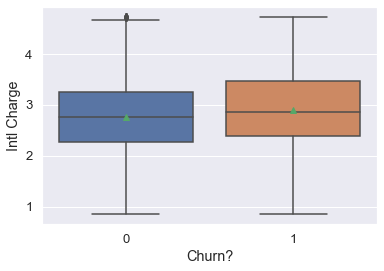

In [97]:
sns.boxplot(churn_df['Churn?'],churn_df['Intl Charge'],showmeans=True)

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='Churn?', ylabel='Intl Charge'>

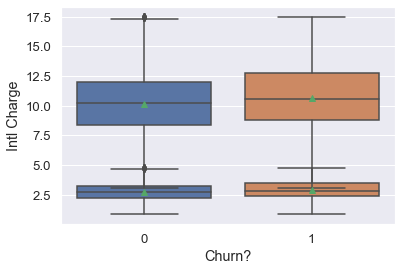

In [96]:
sns.boxplot(churn_df['Churn?'],churn_df['Intl Mins'],showmeans=True)

# 'Intl Mins' & 'Intl Charge' have very little corelation with 'Intl Calls' (.03). However these two features are not that significant with customer churn.  

In [74]:
print(churn_df.groupby("Churn?")['Intl Calls'].count())

Churn?
0    2850
1     483
Name: Intl Calls, dtype: int64


# The 'Intl Calls' is more who stayed back as per the call count given above. But we can not conclude on this as only 14% of the data is having churned data

# 4. 'Day Charge' 

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


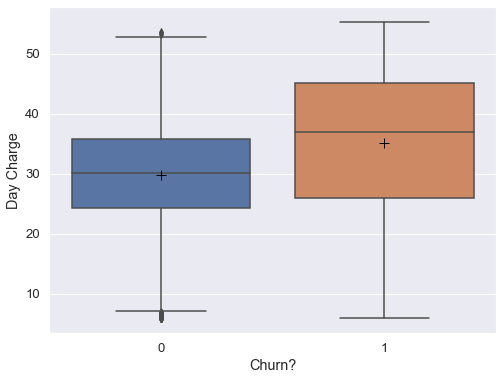

In [82]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.boxplot(churn_df['Churn?'],churn_df['Day Charge'],showmeans=True,
           meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"});


# Explanation

# The 'Day Charge' mean is much higher (nearly 34-35)  for those who churned in comparison to those who did not. Also the median ( nearly 35) for those who churned is much higher than the customers who did not.  

# Suggestion 

# So 'Day Charge' is an important feature for churning. To prevent for those who are predicted to churn can be offered/campainged for a packge which have lower 'Day Charge'.   

#### From the BoxPlot/Distribution plot is is clear that the customers who churned is little left scewed while who did not churn is little right scewed. That means people who chruned made much less international call minutes than those who did not churn.   

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


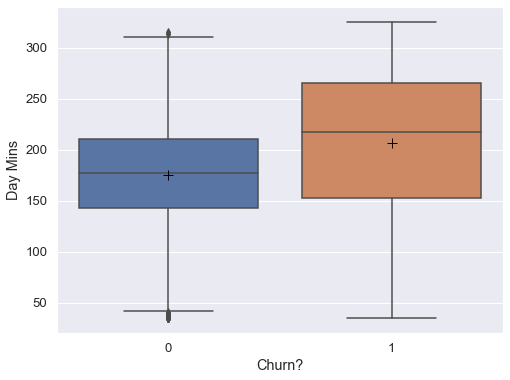

In [87]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.boxplot(churn_df['Churn?'],churn_df['Day Mins'],showmeans=True,
           meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"});

# Explanation

# The 'Day Mins' mean is much higher (nearly ~220)  for those who churned in comparison to those who did not. Also the median ( nearly ~175) for those who churned is much higher than the customers who did not. 

# Suggestion 

# So 'Day Min' is an important feature for churning. To prevent for those who are predicted to churn can be offered/campainged for a packge which have lower charge per 'Day Mins'. 

# THE XGBOOST OUTPUT
<img src='features_xgboost.png' height=400 width=400/>

# Creating the Labele of Given dataset and saving in csv file

In [45]:
UL_df=pd.read_csv("unlabeled_customers.csv")
UL_df.head(5)

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge  Eve Mins  Eve Calls  \
0             25     265.1        110       45.07     197.4         99   
1             26     161.6        123       27.47     195.5        103   
2              0     243.4        114       41.38     121.2        110   
3              0     299.4         71       50.90      61.9         88   
4              0     166.7        113       28.34     148.3        122   

   Eve Charge  Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  \
0       16.78       244.7           91         11.01       10.0           3   
1       16.62       254.4          103         11.45       13.7           3   
2       10.30       162.6          104          7.32       12.2           5   
3        5.26       196.9           89          8.86        6.6           7   
4       12.61       186.9          121          8.41       10.1           3   

   Intl Charge  CustServ Calls  
0         2.70               1  
1         3.70               1  
2         3.29               0  
3         1.78               2  
4         2.73               3

##  Converting all objects to categorical codes

In [46]:
for feature in UL_df.columns: 
    if UL_df[feature].dtype == 'object': 
        print('\n')
        UL_df[feature] = pd.Categorical(UL_df[feature]).codes
UL_df.head(5)

State  Account Length  Area Code  Phone  Int'l Plan  VMail Plan  \
0     16             128        415   1049           0           1   
1     35             107        415    858           0           1   
2     31             137        415    616           0           0   
3     35              84        408    936           1           0   
4     36              75        415     57           1           0   

   VMail Message  Day Mins  Day Calls  Day Charge  Eve Mins  Eve Calls  \
0             25     265.1        110       45.07     197.4         99   
1             26     161.6        123       27.47     195.5        103   
2              0     243.4        114       41.38     121.2        110   
3              0     299.4         71       50.90      61.9         88   
4              0     166.7        113       28.34     148.3        122   

   Eve Charge  Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  \
0       16.78       244.7           91         11.01       10.0           3   
1       16.62       254.4          103         11.45       13.7           3   
2       10.30       162.6          104          7.32       12.2           5   
3        5.26       196.9           89          8.86        6.6           7   
4       12.61       186.9          121          8.41       10.1           3   

   Intl Charge  CustServ Calls  
0         2.70               1  
1         3.70               1  
2         3.29               0  
3         1.78               2  
4         2.73               3

# Handling Outliars 

In [47]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [73]:
#columns=['Account Length','Day Mins']
columns=['Account Length', 'Area Code', 'VMail Message', 'Day Mins', 'Day Calls','Day Charge', 'Eve Mins','Eve Calls', 'Eve Charge','Night Mins', 'Night Calls','Night Charge', 'Intl Mins','Intl Calls','Intl Charge', 'CustServ Calls']

i=0


for column in columns:   
    ol_upper_cnt=0
    ol_lower_cnt=0
    lower,upper=remove_outlier(UL_df[column])
    if (UL_df[column].dtype != 'object'):
        
        print("Attribute Name: ",column)
        print("Lower Bound: ",lower)
        print("Upper Bound: ",upper)
        print("Numer of records: ",len(UL_df[column]))
        for i in range(len(UL_df[column])):
            if(UL_df[column][i]<lower):
                ol_lower_cnt=ol_lower_cnt+1          
            if(UL_df[column][i]>upper):
                ol_upper_cnt=ol_upper_cnt+1
            i+=1    
    
        print("Count of Upper outliars: ",ol_upper_cnt)
        print("Count of Lower outliars: ",ol_lower_cnt)
        tot_ol=ol_lower_cnt+ol_upper_cnt
        print("Total Outliars: ",tot_ol)
        print("Total Outliars%: ",(tot_ol/len(UL_df[column])*100),'\n\n')       

Attribute Name:  Account Length
Lower Bound:  -8.0
Upper Bound:  208.0
Numer of records:  1809
Count of Upper outliars:  10
Count of Lower outliars:  0
Total Outliars:  10
Total Outliars%:  0.552791597567717 


Attribute Name:  Area Code
Lower Bound:  272.5
Upper Bound:  652.5
Numer of records:  1809
Count of Upper outliars:  0
Count of Lower outliars:  0
Total Outliars:  0
Total Outliars%:  0.0 


Attribute Name:  VMail Message
Lower Bound:  -31.5
Upper Bound:  52.5
Numer of records:  1809
Count of Upper outliars:  0
Count of Lower outliars:  0
Total Outliars:  0
Total Outliars%:  0.0 


Attribute Name:  Day Mins
Lower Bound:  36.900000000000006
Upper Bound:  324.9
Numer of records:  1809
Count of Upper outliars:  8
Count of Lower outliars:  8
Total Outliars:  16
Total Outliars%:  0.8844665561083471 


Attribute Name:  Day Calls
Lower Bound:  48.0
Upper Bound:  152.0
Numer of records:  1809
Count of Upper outliars:  5
Count of Lower outliars:  10
Total Outliars:  15
Total Outliars%:  

# OBSERVATION 

<span style='font-family: Arial; font-size:1.4em;color:green'>     
It can be noticed that for none of the feature the outliar is more than 1-2% hence it is better to be replaced by upper/lower limites

</span>    

In [14]:
columns=['Account Length', 'Area Code', 'VMail Message', 'Day Mins', 'Day Calls','Day Charge', 
          'Eve Mins','Eve Calls', 'Eve Charge','Night Mins', 'Night Calls','Night Charge', 'Intl Mins',
          'Intl Calls','Intl Charge', 'CustServ Calls']
for i in columns:                                        
    lower,upper=remove_outlier(UL_df[i])
    UL_df[i]=np.where(UL_df[i]>upper,upper,UL_df[i])
    UL_df[i]=np.where(UL_df[i]<lower,lower,UL_df[i])

<AxesSubplot:>

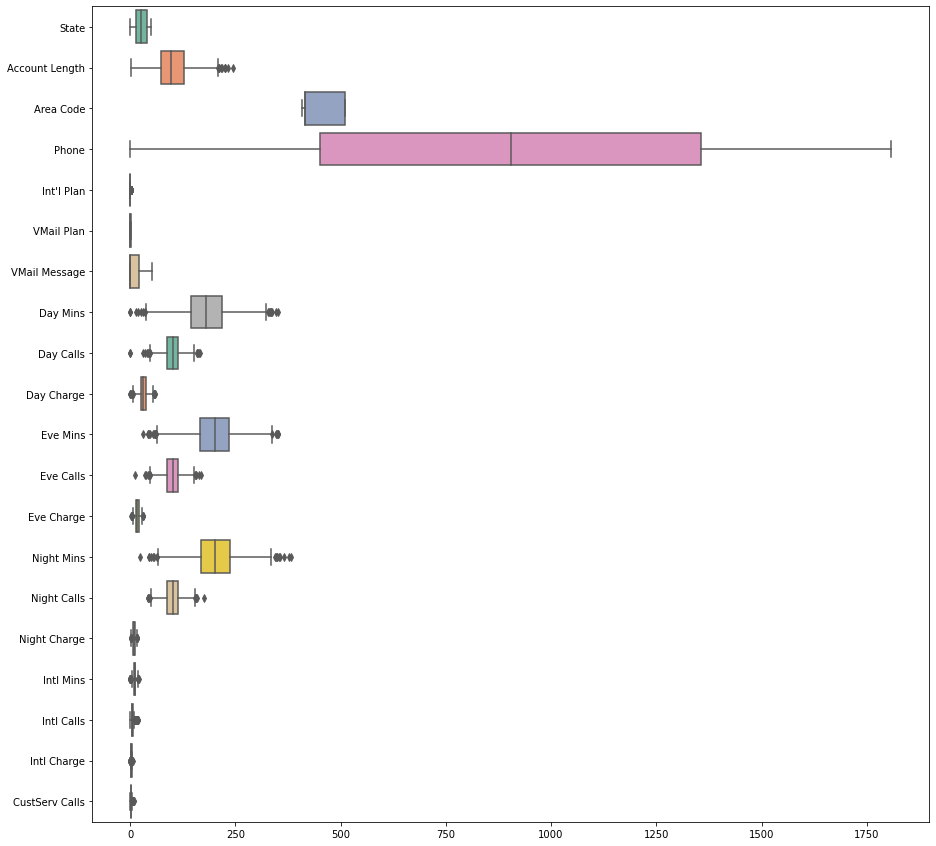

In [51]:
# construct box plot for continuous variables
plt.figure(figsize=(15,15))
sns.boxplot(data=UL_df, orient="h", palette="Set2")

# Writing the Unlebeled to Lebeled Customers to a CSV file 

In [139]:
# The prediction is done from XGboost model
predict_UL = model.predict(UL_df)

In [140]:
UL_df["Churn?"]=predict_UL

In [141]:
UL_df.to_csv('Labeled_Customers.csv')